In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tamil-nadu-2021-state-elections/Tamil_Nadu_State_Elections_2021_Details.csv
/kaggle/input/tamil-nadu-2021-state-elections/Tamil_Nadu_State_Elections_2021_Constituency_Metadata.csv
/kaggle/input/tamil-nadu-2021-state-elections/Tamil_Nadu_State_Elections_2021_Alliance.csv


In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',234)

## DATA CLEANING

In [3]:
data1=pd.read_csv("/kaggle/input/tamil-nadu-2021-state-elections/Tamil_Nadu_State_Elections_2021_Details.csv")
data2=pd.read_csv("/kaggle/input/tamil-nadu-2021-state-elections/Tamil_Nadu_State_Elections_2021_Constituency_Metadata.csv")
data3=pd.read_csv("/kaggle/input/tamil-nadu-2021-state-elections/Tamil_Nadu_State_Elections_2021_Alliance.csv")

In [4]:
data1.head()

,Constituency,Candidate,Party,EVM_Votes,Postal_Votes,Total_Votes,%_of_Votes,Tot_Constituency_votes_polled,Tot_votes_by_parties,Winning_votes,Win_Lost_Flag
0,Alandur,T.M.Anbarasan,Dravida Munnetra Kazhagam,115777,1008,116785,49.12,237751,17430100,116785,True
1,Alandur,B.Valarmathi,All India Anna Dravida Munnetra Kazhagam,75634,580,76214,32.06,237751,15390974,116785,False
2,Alandur,N.Raja,Desiya Makkal Sakthi Katchi,261,4,265,0.11,237751,4125,116785,False
3,Alandur,G Kamalakannan,Tamil Nadu Ilangyar Katchi,1096,9,1105,0.46,237751,22953,116785,False
4,Alandur,Dr.R.Karthikeyan,Naam Tamilar Katchi,16453,53,16506,6.94,237751,3041974,116785,False


In [5]:
data2.head()

,Constituency,Tot_Constituency_votes_polled,Cons_vote_pct,Tot_parties_competed,District,Reserved,Lok_sabha_constituency,State_Name
0,Alandur,237751,0.514206,26,Kancheepuram,GENERAL,Sriperumbudur,Tamil Nadu
1,Alangudi,171842,0.371659,12,Pudukkottai,GENERAL,Sivaganga,Tamil Nadu
2,Alangulam,203478,0.440081,11,Tenkasi,GENERAL,Tirunelveli,Tamil Nadu
3,Ambasamudram,177681,0.384287,13,Tirunelveli,GENERAL,Tirunelveli,Tamil Nadu
4,Ambattur,240299,0.519717,24,Tiruvallur,GENERAL,Sriperumbudur,Tamil Nadu


In [6]:
data3.head()

,ALLIANCE_NAME,PARTY_FULL_NAME,PARTY_ABBR,Total_Constituency
0,National Democratic Alliance,All India Anna Dravida Munnetra Kazhagam,AIADMK,179
1,National Democratic Alliance,Pattali Makkal Katchi,PMK,23
2,National Democratic Alliance,Bharatiya Janata Party,BJP,20
3,National Democratic Alliance,Tamil Maanila Congress (Moopanar),TMC(M),6
4,National Democratic Alliance,Perunthalaivar Makkal Katchi,PTMK,1


In [7]:
data1.isna().sum().sum(),data2.isna().sum().sum(),data3.isna().sum().sum()

(0, 76, 0)

In [8]:
data2.isna().sum()

Constituency                      0
Tot_Constituency_votes_polled     0
Cons_vote_pct                     0
Tot_parties_competed              0
District                         19
Reserved                         19
Lok_sabha_constituency           19
State_Name                       19
dtype: int64

In [9]:
data2['Reserved'].unique()

array(['GENERAL', 'SC', nan, 'ST'], dtype=object)

In [10]:
data2[data2['Reserved'].isna()==True]

,Constituency,Tot_Constituency_votes_polled,Cons_vote_pct,Tot_parties_competed,District,Reserved,Lok_sabha_constituency,State_Name
27,Coimbatore (North),202799,0.438612,21,NaN,NaN,NaN,NaN
33,Dr.Radhakrishnan Nagar,187027,0.404501,32,NaN,NaN,NaN,NaN
55,Kilvaithinankuppam,174124,0.376594,11,NaN,NaN,NaN,NaN
73,Madurantakam,185842,0.401938,11,NaN,NaN,NaN,NaN
78,Manapparai,221748,0.479595,23,NaN,NaN,NaN,NaN
80,Mettuppalayam,225083,0.486808,11,NaN,NaN,NaN,NaN
91,Nilakkottai,184805,0.399695,19,NaN,NaN,NaN,NaN
103,Pappireddipatti,220994,0.477964,16,NaN,NaN,NaN,NaN
105,Paramathi-Velur,183697,0.397299,28,NaN,NaN,NaN,NaN
143,Thirumangalam,220495,0.476885,25,NaN,NaN,NaN,NaN


In [11]:
len(data2['Constituency'].unique())

234

In [12]:
len(data2['State_Name'].unique())

2

In [13]:
data1.duplicated().sum(),data2.duplicated().sum(),data3.duplicated().sum(),

(0, 0, 0)

In [14]:
data2.drop('State_Name',axis=1,inplace=True) #Tamil Nadu's election result so its unwanted

In [15]:
list_of_null=list(data2[data2['District'].isna()==True].index)
list_of_null.append(33)

In [16]:
len(data2['Lok_sabha_constituency'].unique())

40

In [17]:
data2['District'].unique()

array(['Kancheepuram', 'Pudukkottai', 'Tenkasi', 'Tirunelveli',
       'Tiruvallur', 'Tirupattur', 'Vellore', 'Theni', 'Chennai', 'Erode',
       'Tiruvannamalai', 'Karur', 'Ranipet', 'Ariyalur', 'Virudhunagar',
       'Dindigul', 'Salem', 'Tiruppur', 'Krishnagiri', 'Cuddalore',
       'Chengalpattu', nan, 'Nilgiris', 'Dharmapuri', 'Viluppuram',
       'Kanniyakumari', 'Coimbatore', 'Namakkal', 'Thanjavur',
       'Perambalur', 'Tiruchirappalli', 'Madurai', 'Sivaganga',
       'Thiruvarur', 'Ramanathapuram', 'Thoothukudi', 'Mayiladuthurai',
       'Kallakurichi', 'Nagapattinam'], dtype=object)

In [18]:
list_of_null

[27,
 33,
 55,
 73,
 78,
 80,
 91,
 103,
 105,
 143,
 165,
 166,
 186,
 195,
 215,
 224,
 225,
 229,
 231,
 33]

In [19]:
for i in list_of_null:
    print(i,data2.iloc[i]['Constituency'])

27 Coimbatore (North)
33 Dr.Radhakrishnan Nagar
55 Kilvaithinankuppam
73 Madurantakam
78 Manapparai
80 Mettuppalayam
91 Nilakkottai
103 Pappireddipatti
105 Paramathi-Velur
143 Thirumangalam
165 Tiruppattur
166 Tiruppur (South)
186 Virugampakkam
195 Gandarvakkottai
215 Tiruppur (North)
224 Vriddhachalam
225 Coimbatore (South)
229 Sholinghur
231 Thiruporur
33 Dr.Radhakrishnan Nagar


In [20]:
data2.at[33, 'Reserved']=np.NaN

In [21]:
list_of_null

[27,
 33,
 55,
 73,
 78,
 80,
 91,
 103,
 105,
 143,
 165,
 166,
 186,
 195,
 215,
 224,
 225,
 229,
 231,
 33]

In [22]:
data2.at[231, 'Lok_sabha_constituency']="Kanchipuram"
data2.at[229, 'Lok_sabha_constituency']="Arakkonam"
data2.at[225, 'Lok_sabha_constituency']="Coimbatore"
data2.at[224, 'Lok_sabha_constituency']="Cuddalore"
data2.at[215, 'Lok_sabha_constituency']="Tiruppur"
data2.at[195, 'Lok_sabha_constituency']="Tiruchirappalli"
data2.at[186, 'Lok_sabha_constituency']="Chennai South"
data2.at[166, 'Lok_sabha_constituency']="Tiruppur"
data2.at[165, 'Lok_sabha_constituency']="Sivaganga"
data2.at[143, 'Lok_sabha_constituency']="Virudhunagar"
data2.at[105, 'Lok_sabha_constituency']="Namakkal"
data2.at[103, 'Lok_sabha_constituency']="Dharamapuri"
data2.at[91, 'Lok_sabha_constituency']="Dindigul"
data2.at[91, 'Reserved']="SC"
data2.at[80, 'Lok_sabha_constituency']="Nilgiris"
data2.at[78, 'Lok_sabha_constituency']="Karur"
data2.at[73, 'Lok_sabha_constituency']="Kanchipuram"
data2.at[73, 'Reserved']="SC"

data2.at[55, 'Lok_sabha_constituency']="Vellore"
data2.at[55, 'Reserved']="SC"

data2.at[27, 'Lok_sabha_constituency']="Coimbatore"
data2.at[33, 'Lok_sabha_constituency']="Chennai North"

In [23]:
data2.at[231, 'District']="Chengalpattu"
data2.at[229, 'District']="Ranipet"
data2.at[225, 'District']="Coimbatore"
data2.at[224, 'District']="Cuddalore"
data2.at[215, 'District']="Tiruppur"
data2.at[195, 'District']="Pudukkottai"
data2.at[186, 'District']="Chennai"
data2.at[166, 'District']="Tiruppur"
data2.at[165, 'District']="Sivaganga"
data2.at[143, 'District']="Madurai"
data2.at[105, 'District']="Namakkal"
data2.at[103, 'District']="Dharamapuri"
data2.at[91, 'District']="Dindigul"
data2.at[80, 'District']="Coimbatore"
data2.at[78, 'District']="Tiruchirappalli"
data2.at[73, 'District']="Kanchipuram"
data2.at[27, 'District']="Coimbatore"
data2.at[33, 'District']="Chennai"
data2.at[55, 'District']="Vellore"

In [24]:
data2[data2['Reserved'].isna()==True]

,Constituency,Tot_Constituency_votes_polled,Cons_vote_pct,Tot_parties_competed,District,Reserved,Lok_sabha_constituency
27,Coimbatore (North),202799,0.438612,21,Coimbatore,NaN,Coimbatore
33,Dr.Radhakrishnan Nagar,187027,0.404501,32,Chennai,NaN,Chennai North
78,Manapparai,221748,0.479595,23,Tiruchirappalli,NaN,Karur
80,Mettuppalayam,225083,0.486808,11,Coimbatore,NaN,Nilgiris
103,Pappireddipatti,220994,0.477964,16,Dharamapuri,NaN,Dharamapuri
105,Paramathi-Velur,183697,0.397299,28,Namakkal,NaN,Namakkal
143,Thirumangalam,220495,0.476885,25,Madurai,NaN,Virudhunagar
165,Tiruppattur,210766,0.455843,27,Sivaganga,NaN,Sivaganga
166,Tiruppur (South),174418,0.377230,21,Tiruppur,NaN,Tiruppur
186,Virugampakkam,169087,0.365700,28,Chennai,NaN,Chennai South


In [25]:
data2.at[229, 'Reserved']="SC"

In [26]:
data2['Reserved'].fillna('GENERAL',inplace=True)

In [27]:
data2.isna().sum()

Constituency                     0
Tot_Constituency_votes_polled    0
Cons_vote_pct                    0
Tot_parties_competed             0
District                         0
Reserved                         0
Lok_sabha_constituency           0
dtype: int64

In [28]:
data2_cleaned=data2.copy()

In [29]:
data2_cleaned.to_csv("data_cleaned_tn.csv",index=False)

In [30]:
data1.shape

(4232, 11)

In [31]:
data2[data2['District'].isna()==True]

,Constituency,Tot_Constituency_votes_polled,Cons_vote_pct,Tot_parties_competed,District,Reserved,Lok_sabha_constituency


In [32]:
data1=pd.read_csv("/kaggle/input/tamil-nadu-2021-state-elections/Tamil_Nadu_State_Elections_2021_Details.csv")


In [33]:
data1['Win/Loss']=np.where(data1['Win_Lost_Flag'],1,0)

In [34]:
data1.drop('Win_Lost_Flag',axis=1,inplace=True)

In [35]:
data1.info(),data2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232 entries, 0 to 4231
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Constituency                   4232 non-null   object 
 1   Candidate                      4232 non-null   object 
 2   Party                          4232 non-null   object 
 3   EVM_Votes                      4232 non-null   int64  
 4   Postal_Votes                   4232 non-null   int64  
 5   Total_Votes                    4232 non-null   int64  
 6   %_of_Votes                     4232 non-null   float64
 7   Tot_Constituency_votes_polled  4232 non-null   int64  
 8   Tot_votes_by_parties           4232 non-null   int64  
 9   Winning_votes                  4232 non-null   int64  
 10  Win/Loss                       4232 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 363.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

(None, None)

In [36]:
data1_2_joined=data1.merge(data2_cleaned,how='left',on='Constituency')

In [37]:
data3.head()

,ALLIANCE_NAME,PARTY_FULL_NAME,PARTY_ABBR,Total_Constituency
0,National Democratic Alliance,All India Anna Dravida Munnetra Kazhagam,AIADMK,179
1,National Democratic Alliance,Pattali Makkal Katchi,PMK,23
2,National Democratic Alliance,Bharatiya Janata Party,BJP,20
3,National Democratic Alliance,Tamil Maanila Congress (Moopanar),TMC(M),6
4,National Democratic Alliance,Perunthalaivar Makkal Katchi,PTMK,1


In [38]:
data3.rename(columns={'PARTY_FULL_NAME':'Party'},inplace=True)

In [39]:
data1_2_3_joined=data1_2_joined.merge(data3,how="left",on="Party")

In [40]:
data1_2_3_joined.drop('PARTY_ABBR',axis=1,inplace=True)

In [41]:
data1_2_3_joined.head()

,Constituency,Candidate,Party,EVM_Votes,Postal_Votes,Total_Votes,%_of_Votes,Tot_Constituency_votes_polled_x,Tot_votes_by_parties,Winning_votes,Win/Loss,Tot_Constituency_votes_polled_y,Cons_vote_pct,Tot_parties_competed,District,Reserved,Lok_sabha_constituency,ALLIANCE_NAME,Total_Constituency
0,Alandur,T.M.Anbarasan,Dravida Munnetra Kazhagam,115777,1008,116785,49.12,237751,17430100,116785,1,237751,0.514206,26,Kancheepuram,GENERAL,Sriperumbudur,Secular Progressive Alliance,173.0
1,Alandur,B.Valarmathi,All India Anna Dravida Munnetra Kazhagam,75634,580,76214,32.06,237751,15390974,116785,0,237751,0.514206,26,Kancheepuram,GENERAL,Sriperumbudur,National Democratic Alliance,179.0
2,Alandur,N.Raja,Desiya Makkal Sakthi Katchi,261,4,265,0.11,237751,4125,116785,0,237751,0.514206,26,Kancheepuram,GENERAL,Sriperumbudur,NaN,NaN
3,Alandur,G Kamalakannan,Tamil Nadu Ilangyar Katchi,1096,9,1105,0.46,237751,22953,116785,0,237751,0.514206,26,Kancheepuram,GENERAL,Sriperumbudur,NaN,NaN
4,Alandur,Dr.R.Karthikeyan,Naam Tamilar Katchi,16453,53,16506,6.94,237751,3041974,116785,0,237751,0.514206,26,Kancheepuram,GENERAL,Sriperumbudur,Non-aligned parties,234.0


In [42]:
data1_2_3_joined['Reserved'].value_counts()

GENERAL    3587
SC          615
ST           30
Name: Reserved, dtype: int64

In [43]:
len(data3['ALLIANCE_NAME'].unique())

5

In [44]:
len(data1_2_3_joined['ALLIANCE_NAME'].unique())

6

In [45]:
data1_2_3_joined['ALLIANCE_NAME'].fillna('Non-aligned parties',inplace=True)

In [46]:
data1_2_3_joined.to_csv('data1_2_3_joined.csv',index=False)

## DATA ANALYSIS

In [47]:
data1_2_3_joined['Total_Votes'].sum()

46236492

In [48]:
data1_2_3_joined.head()

,Constituency,Candidate,Party,EVM_Votes,Postal_Votes,Total_Votes,%_of_Votes,Tot_Constituency_votes_polled_x,Tot_votes_by_parties,Winning_votes,Win/Loss,Tot_Constituency_votes_polled_y,Cons_vote_pct,Tot_parties_competed,District,Reserved,Lok_sabha_constituency,ALLIANCE_NAME,Total_Constituency
0,Alandur,T.M.Anbarasan,Dravida Munnetra Kazhagam,115777,1008,116785,49.12,237751,17430100,116785,1,237751,0.514206,26,Kancheepuram,GENERAL,Sriperumbudur,Secular Progressive Alliance,173.0
1,Alandur,B.Valarmathi,All India Anna Dravida Munnetra Kazhagam,75634,580,76214,32.06,237751,15390974,116785,0,237751,0.514206,26,Kancheepuram,GENERAL,Sriperumbudur,National Democratic Alliance,179.0
2,Alandur,N.Raja,Desiya Makkal Sakthi Katchi,261,4,265,0.11,237751,4125,116785,0,237751,0.514206,26,Kancheepuram,GENERAL,Sriperumbudur,Non-aligned parties,NaN
3,Alandur,G Kamalakannan,Tamil Nadu Ilangyar Katchi,1096,9,1105,0.46,237751,22953,116785,0,237751,0.514206,26,Kancheepuram,GENERAL,Sriperumbudur,Non-aligned parties,NaN
4,Alandur,Dr.R.Karthikeyan,Naam Tamilar Katchi,16453,53,16506,6.94,237751,3041974,116785,0,237751,0.514206,26,Kancheepuram,GENERAL,Sriperumbudur,Non-aligned parties,234.0


## PARTICIPATED CONSTITUENCIES PARTY-WISE

In [49]:
data1_2_3_joined.groupby('Party')['Party'].count().sort_values(ascending=False).head(10)

Party
Independent                                 2073
None of the Above                            234
Naam Tamilar Katchi                          234
All India Anna Dravida Munnetra Kazhagam     191
Dravida Munnetra Kazhagam                    188
Makkal Needhi Maiam                          180
Amma Makkal Munnettra Kazagam                165
Bahujan Samaj Party                          162
Desiya Murpokku Dravida Kazhagam              60
My India Party                                59
Name: Party, dtype: int64

## WIN NUMBERS PARTY-WISE

In [50]:
data1_2_3_joined.groupby('Party')['Win/Loss'].sum().sort_values(ascending=False).head(10)

Party
Dravida Munnetra Kazhagam                   133
All India Anna Dravida Munnetra Kazhagam     66
Indian National Congress                     18
Pattali Makkal Katchi                         5
Viduthalai Chiruthaigal Katchi                4
Bharatiya Janata Party                        4
Communist Party of India                      2
Communist Party of India  (Marxist)           2
Namadhu Makkal Katchi                         0
People's Party of India(secular)              0
Name: Win/Loss, dtype: int64

## PERCENTAGE OF WIN IN PARTICIPATED

In [51]:
(data1_2_3_joined.groupby('Party')['Win/Loss'].sum()/data1_2_3_joined.groupby('Party')['Party'].count()).sort_values(ascending=False).head(10)

Party
Indian National Congress                    0.720000
Dravida Munnetra Kazhagam                   0.707447
Viduthalai Chiruthaigal Katchi              0.666667
All India Anna Dravida Munnetra Kazhagam    0.345550
Communist Party of India                    0.333333
Communist Party of India  (Marxist)         0.333333
Pattali Makkal Katchi                       0.217391
Bharatiya Janata Party                      0.200000
Namadhu Makkal Katchi                       0.000000
People's Party of India(secular)            0.000000
dtype: float64

## FURTHER ANALYSIS ON DMK - ADMK COMPETITION

## 50% of the competition btw both the Dravidian parties were closely knit with 1 to 10 % difference

In [52]:
a=data1_2_3_joined[data1_2_3_joined['Party']=='Dravida Munnetra Kazhagam'][['Constituency','Party','Total_Votes']]
b=data1_2_3_joined[data1_2_3_joined['Party']=='All India Anna Dravida Munnetra Kazhagam'][['Constituency','Party','Total_Votes','Tot_Constituency_votes_polled_x']]
c=a.merge(b,on='Constituency',how='left')
c['Percentage Difference']=np.round(np.abs((c['Total_Votes_x']/c['Tot_Constituency_votes_polled_x'])-(c['Total_Votes_y']/c['Tot_Constituency_votes_polled_x']))*100,2)
c.dropna(inplace=True)
c[c['Percentage Difference']<10]

,Constituency,Party_x,Total_Votes_x,Party_y,Total_Votes_y,Tot_Constituency_votes_polled_x,Percentage Difference
2,Alangulam,Dravida Munnetra Kazhagam,70614,All India Anna Dravida Munnetra Kazhagam,74153.0,203478.0,1.74
3,Ambasamudram,Dravida Munnetra Kazhagam,68296,All India Anna Dravida Munnetra Kazhagam,85211.0,177681.0,9.52
6,Anaikattu,Dravida Munnetra Kazhagam,95159,All India Anna Dravida Munnetra Kazhagam,88799.0,197805.0,3.22
7,Andipatti,Dravida Munnetra Kazhagam,93541,All India Anna Dravida Munnetra Kazhagam,85003.0,209540.0,4.07
9,Anthiyur,Dravida Munnetra Kazhagam,79096,All India Anna Dravida Munnetra Kazhagam,77821.0,176385.0,0.72
10,Arani,Dravida Munnetra Kazhagam,99833,All India Anna Dravida Munnetra Kazhagam,102961.0,221422.0,1.41
13,Ariyalur,Dravida Munnetra Kazhagam,103975,All India Anna Dravida Munnetra Kazhagam,100741.0,225225.0,1.44
16,Attur,Dravida Munnetra Kazhagam,87051,All India Anna Dravida Munnetra Kazhagam,95308.0,199743.0,4.13
19,Bargur,Dravida Munnetra Kazhagam,97256,All India Anna Dravida Munnetra Kazhagam,84642.0,197784.0,6.38
21,Bhuvanagiri,Dravida Munnetra Kazhagam,88194,All India Anna Dravida Munnetra Kazhagam,96453.0,197165.0,4.19


In [53]:
87/156

0.5576923076923077

## SC RESERVED ANALYSIS

In [54]:
data1_2_3_joined['Reserved'].value_counts()

GENERAL    3587
SC          615
ST           30
Name: Reserved, dtype: int64

In [55]:
data1_2_3_joined[data1_2_3_joined['Reserved']=='SC'].groupby('Party')['Party'].count().sort_values(ascending=False)

Party
Independent                                                   245
None of the Above                                              43
Naam Tamilar Katchi                                            43
All India Anna Dravida Munnetra Kazhagam                       37
Bahujan Samaj Party                                            33
Makkal Needhi Maiam                                            32
Dravida Munnetra Kazhagam                                      28
Amma Makkal Munnettra Kazagam                                  23
Desiya Murpokku Dravida Kazhagam                               20
My India Party                                                 12
Puthiya Tamilagam                                              11
Indiya Jananayaka Katchi                                       10
Indian National Congress                                        6
Viduthalai Chiruthaigal Katchi                                  4
Pattali Makkal Katchi                                           4
Anai

## AIADMK participated in 37 SC Reserved constituencies and won 15 -> 40 % win rate

In [56]:
data1_2_3_joined[(data1_2_3_joined['Reserved']=='SC') & (data1_2_3_joined['Party']=='All India Anna Dravida Munnetra Kazhagam') & data1_2_3_joined['Win/Loss']].shape[0]

15

## DMK participated in 28 SC Reserved constituencies and won 21 -> 75% win rate

In [57]:
data1_2_3_joined[(data1_2_3_joined['Reserved']=='SC') & (data1_2_3_joined['Party']=='Dravida Munnetra Kazhagam') & data1_2_3_joined['Win/Loss']].shape[0]

21

## VCK participated in 4 SC Reserved constituencies and won 2 -> 50% win rate

In [58]:
data1_2_3_joined[(data1_2_3_joined['Reserved']=='SC') & (data1_2_3_joined['Party']=='Viduthalai Chiruthaigal Katchi') & data1_2_3_joined['Win/Loss']].shape[0]

2

## INC participated in 6 SC Reserved constituencies and won 3 -> 50% win rate

In [59]:
data1_2_3_joined[(data1_2_3_joined['Reserved']=='SC') & (data1_2_3_joined['Party']=='Indian National Congress') & data1_2_3_joined['Win/Loss']].shape[0]

3

## CPI(M) participated in 2 SC Reserved constituencies and won 1 -> 50% win rate

In [60]:
data1_2_3_joined[(data1_2_3_joined['Reserved']=='SC') & (data1_2_3_joined['Party']=='Communist Party of India  (Marxist)') & data1_2_3_joined['Win/Loss']].shape[0]

1

## CPI participated in 3 SC Reserved constituencies and won 1 -> 33% win rate

In [61]:
data1_2_3_joined[(data1_2_3_joined['Reserved']=='SC') & (data1_2_3_joined['Party']=='Communist Party of India') & data1_2_3_joined['Win/Loss']].shape[0]

1

## SC win rate party-wise

In [62]:
(data1_2_3_joined[(data1_2_3_joined['Reserved']=='SC')].groupby('Party')['Win/Loss'].sum()/data1_2_3_joined[(data1_2_3_joined['Reserved']=='SC')].groupby('Party')['Party'].count()).sort_values(ascending=False).head(10)

Party
Dravida Munnetra Kazhagam                   0.750000
Indian National Congress                    0.500000
Communist Party of India  (Marxist)         0.500000
Viduthalai Chiruthaigal Katchi              0.500000
All India Anna Dravida Munnetra Kazhagam    0.405405
Communist Party of India                    0.333333
Pattali Makkal Katchi                       0.000000
Makkalatchi Katchi                          0.000000
My India Party                              0.000000
Naam Indiar Party                           0.000000
dtype: float64

## LOK SABHA WISE ANALYSIS

In [63]:
data1_2_3_joined['ALLIANCE_NAME'].value_counts()

Non-aligned parties             3327
National Democratic Alliance     234
Secular Progressive Alliance     228
AMMK+                            225
Makkalin Mudhal Kootani          218
Name: ALLIANCE_NAME, dtype: int64

## With the TN assembly election results an analysis on lok sabha constituency:

1) National Democratic Alliance: (10 Win; 1 Tie (Krishnagiri)) - Pollachi, Salem, Dharmapuri, Coimbatore, Nilgiris, Kallakurchi, Dindugal, Arani, Thirupor, Thirunalveli


2) Secular Progressive Alliance: (28 Win; 1 Tie( Krishnagiri)) - Rest

In [64]:
for i in data1_2_3_joined['Lok_sabha_constituency'].unique():
    print(i, data1_2_3_joined[(data1_2_3_joined['Win/Loss']==1) &(data1_2_3_joined['Lok_sabha_constituency']==i) ].groupby('ALLIANCE_NAME')['Win/Loss'].count().sort_values(ascending=False))
    print()

Sriperumbudur ALLIANCE_NAME
Secular Progressive Alliance    6
Name: Win/Loss, dtype: int64

Sivaganga ALLIANCE_NAME
Secular Progressive Alliance    5
National Democratic Alliance    1
Name: Win/Loss, dtype: int64

Tirunelveli ALLIANCE_NAME
National Democratic Alliance    3
Secular Progressive Alliance    3
Name: Win/Loss, dtype: int64

Vellore ALLIANCE_NAME
Secular Progressive Alliance    4
National Democratic Alliance    2
Name: Win/Loss, dtype: int64

Theni ALLIANCE_NAME
Secular Progressive Alliance    4
National Democratic Alliance    2
Name: Win/Loss, dtype: int64

Chennai Central ALLIANCE_NAME
Secular Progressive Alliance    6
Name: Win/Loss, dtype: int64

Tiruppur ALLIANCE_NAME
National Democratic Alliance    4
Secular Progressive Alliance    2
Name: Win/Loss, dtype: int64

Arani ALLIANCE_NAME
National Democratic Alliance    3
Secular Progressive Alliance    3
Name: Win/Loss, dtype: int64

Karur ALLIANCE_NAME
Secular Progressive Alliance    5
National Democratic Alliance    1
Nam

## DATA VISUALIZATION

In [65]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

## PARTY WINS VISUALIZATIONS

[Text(0, 0, '66'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '133'),
 Text(0, 0, '18'),
 Text(0, 0, '5'),
 Text(0, 0, '4')]

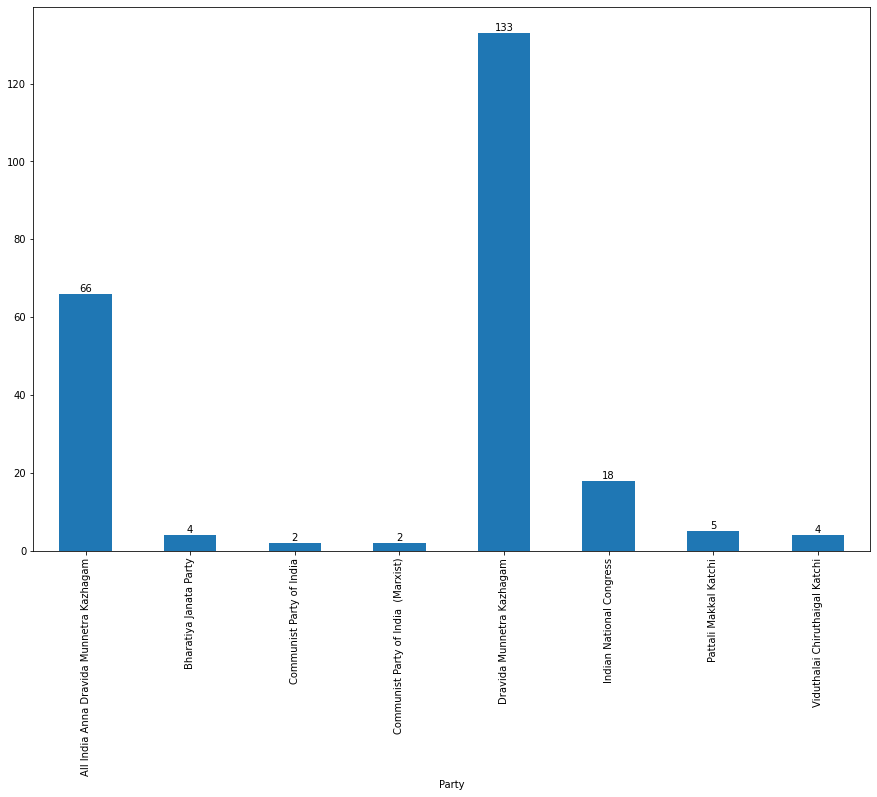

In [66]:
plt.figure(figsize=(15,10))
plt.tight_layout()
datar=data1_2_3_joined.groupby('Party')['Win/Loss'].sum('Win/Loss')
datar=datar[datar.values>0]
ax=datar.plot(kind='bar')
ax.bar_label(ax.containers[0])

## WIN & LOSS OF ADMK & DMK

[Text(0, 0, '55'), Text(0, 0, '133')]

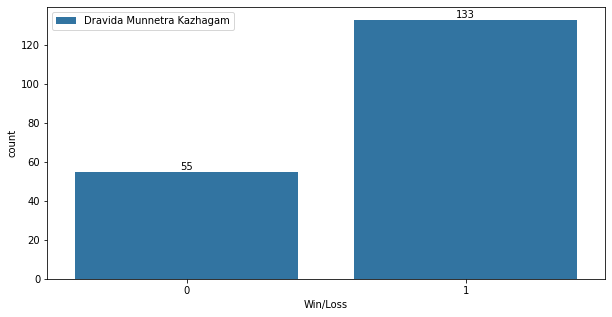

In [67]:
plt.figure(figsize=(10,5))
dravidian_parties_dmk=['Dravida Munnetra Kazhagam']*188
ax=sns.countplot(data1_2_3_joined[(data1_2_3_joined['Party']=='Dravida Munnetra Kazhagam')]['Win/Loss'],hue=dravidian_parties_dmk)
ax.bar_label(ax.containers[0])

[Text(0, 0, '125'), Text(0, 0, '66')]

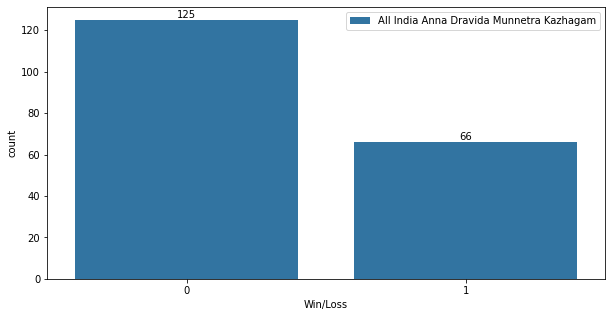

In [68]:
plt.figure(figsize=(10,5))
dravidian_parties_admk=['All India Anna Dravida Munnetra Kazhagam']*191
ax=sns.countplot(data1_2_3_joined[(data1_2_3_joined['Party']=='All India Anna Dravida Munnetra Kazhagam')]['Win/Loss'],hue=dravidian_parties_admk)
ax.bar_label(ax.containers[0])

## VOTE PERCENTAGE DISTRIBUTION PARTY WISE

<AxesSubplot:ylabel='Total_Votes'>

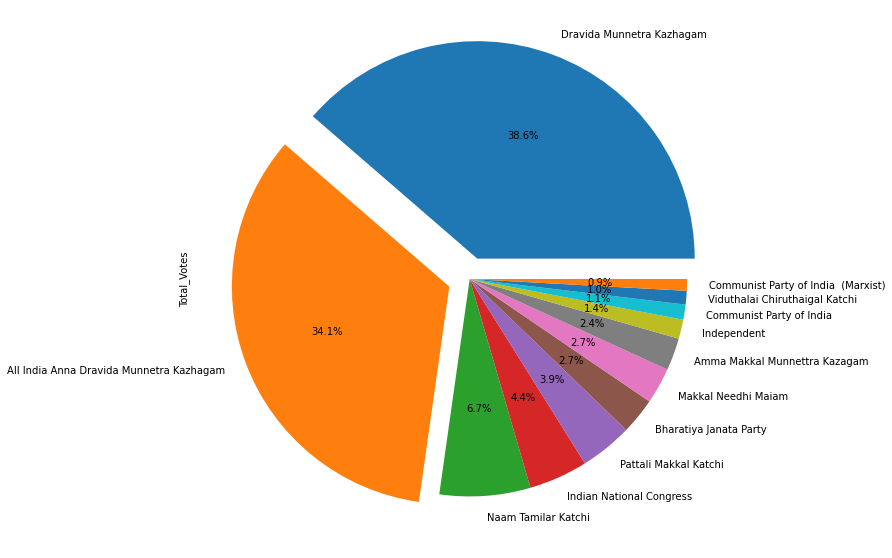

In [69]:
temp_pie=(data1_2_3_joined.groupby('Party')['Total_Votes'].sum().sort_values(ascending=False)/46236492).head(12)
temp_pie.plot.pie(y=temp_pie.values,figsize=(10,10),autopct='%1.1f%%', explode=[0.1,0.1,0,0,0,0,0,0,0,0,0,0])


## CLOSE COMPETITION OF DRAVIDIAN PARTIES

<AxesSubplot:xlabel='Constituency', ylabel='Total_Votes'>

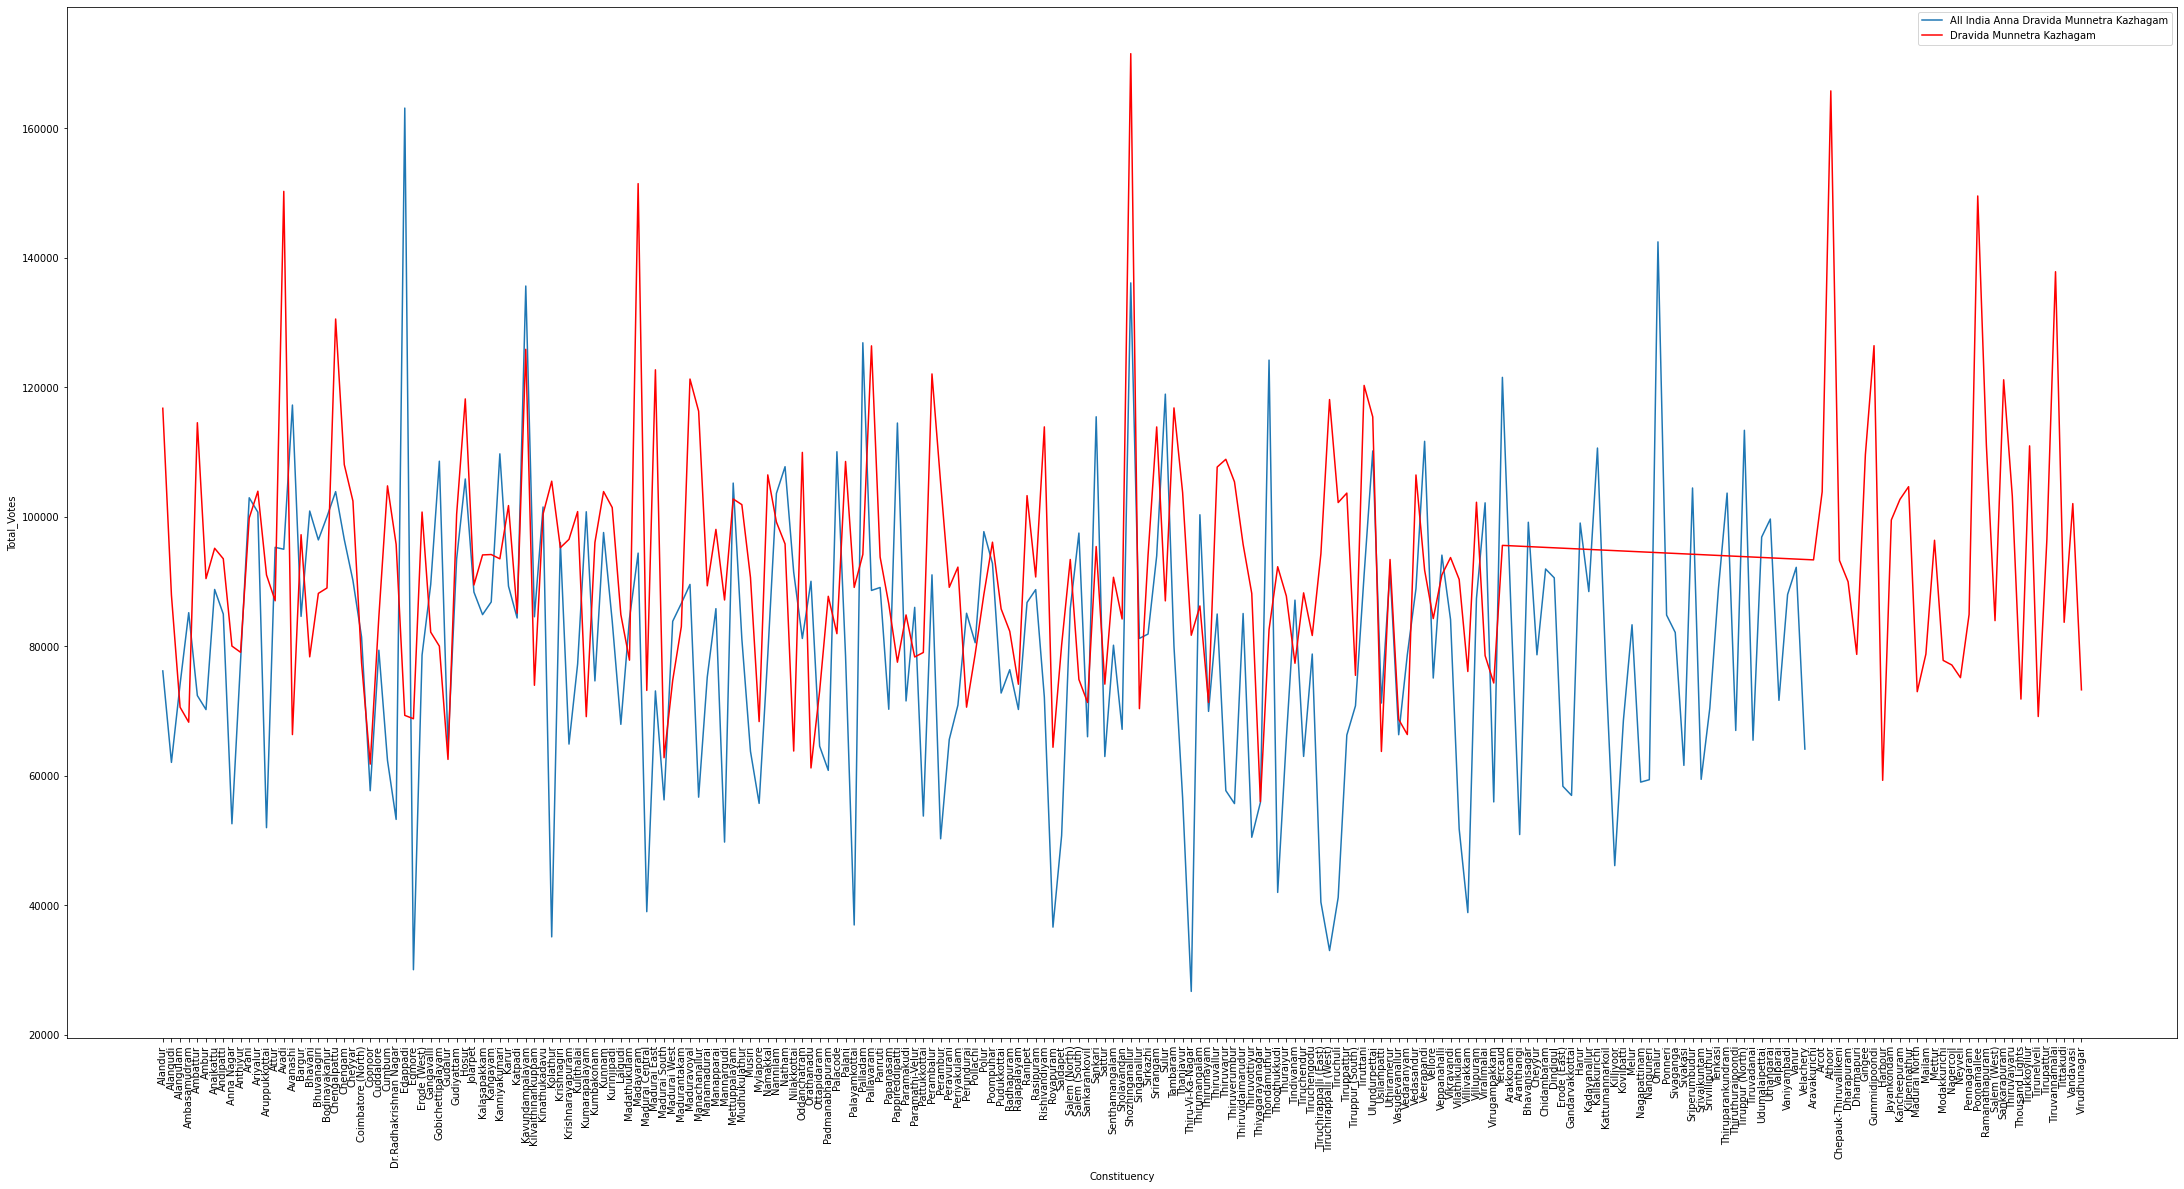

In [70]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
plt.tight_layout()
sns.lineplot(data1_2_3_joined[(data1_2_3_joined['Party']=='All India Anna Dravida Munnetra Kazhagam')]['Constituency'],data1_2_3_joined[(data1_2_3_joined['Party']=='All India Anna Dravida Munnetra Kazhagam')]['Total_Votes'],hue=dravidian_parties_admk)
sns.lineplot(data1_2_3_joined[(data1_2_3_joined['Party']=='Dravida Munnetra Kazhagam')]['Constituency'],data1_2_3_joined[(data1_2_3_joined['Party']=='Dravida Munnetra Kazhagam')]['Total_Votes'],hue=dravidian_parties_dmk,palette=['r'])

In [71]:
data1_2_3_joined_2=data1_2_3_joined.copy()
data1_2_3_joined_2['No_Con_Votes']=np.round(data1_2_3_joined['Cons_vote_pct']*data1_2_3_joined['Tot_Constituency_votes_polled_x'],2)

In [72]:
data1_2_3_joined_2.sort_values(by='Cons_vote_pct',ascending=False)

,Constituency,Candidate,Party,EVM_Votes,Postal_Votes,Total_Votes,%_of_Votes,Tot_Constituency_votes_polled_x,Tot_votes_by_parties,Winning_votes,Win/Loss,Tot_Constituency_votes_polled_y,Cons_vote_pct,Tot_parties_competed,District,Reserved,Lok_sabha_constituency,ALLIANCE_NAME,Total_Constituency,No_Con_Votes
2551,Shozhinganallur,T.ELUMALAI,Anna MGR Dravida Munnetra Kazhagam,160,0,160,0.04,388355,160,171558,0,388355,0.839932,27,Kancheepuram,GENERAL,Chennai South,Non-aligned parties,NaN,326191.71
2541,Shozhinganallur,A.DHANASEKAR,Independent,57,0,57,0.01,388355,643805,171558,0,388355,0.839932,27,Kancheepuram,GENERAL,Chennai South,Non-aligned parties,NaN,326191.71
2534,Shozhinganallur,Dr. V.KANDAN,Independent,146,1,147,0.04,388355,643805,171558,0,388355,0.839932,27,Kancheepuram,GENERAL,Chennai South,Non-aligned parties,NaN,326191.71
2535,Shozhinganallur,D.KALANITHI,Independent,96,0,96,0.02,388355,643805,171558,0,388355,0.839932,27,Kancheepuram,GENERAL,Chennai South,Non-aligned parties,NaN,326191.71
2536,Shozhinganallur,D.SRINIVASAN,Independent,149,0,149,0.04,388355,643805,171558,0,388355,0.839932,27,Kancheepuram,GENERAL,Chennai South,Non-aligned parties,NaN,326191.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,Harbour,UDHAYAKUMAR. V,Independent,25,0,25,0.02,101650,643805,59317,0,101650,0.219848,29,Chennai,GENERAL,Chennai Central,Non-aligned parties,NaN,22347.55
787,Harbour,ANANDRAJ. T.K,Independent,21,0,21,0.02,101650,643805,59317,0,101650,0.219848,29,Chennai,GENERAL,Chennai Central,Non-aligned parties,NaN,22347.55
786,Harbour,RAMESH. A,Makkal Needhi Maiam,3758,5,3763,3.70,101650,1210337,59317,0,101650,0.219848,29,Chennai,GENERAL,Chennai Central,Makkalin Mudhal Kootani,142.0,22347.55
785,Harbour,AHAMED FAZIL. M,Naam Tamilar Katchi,3345,12,3357,3.30,101650,3041974,59317,0,101650,0.219848,29,Chennai,GENERAL,Chennai Central,Non-aligned parties,234.0,22347.55


In [73]:
a=list(data1_2_3_joined_2['Constituency'].unique())

In [74]:
b=list(data1_2_3_joined_2.groupby(data1_2_3_joined_2['Constituency'])['No_Con_Votes'].max())

## Constituency Shozhinganallur had the maximum con votes percentage

<AxesSubplot:>

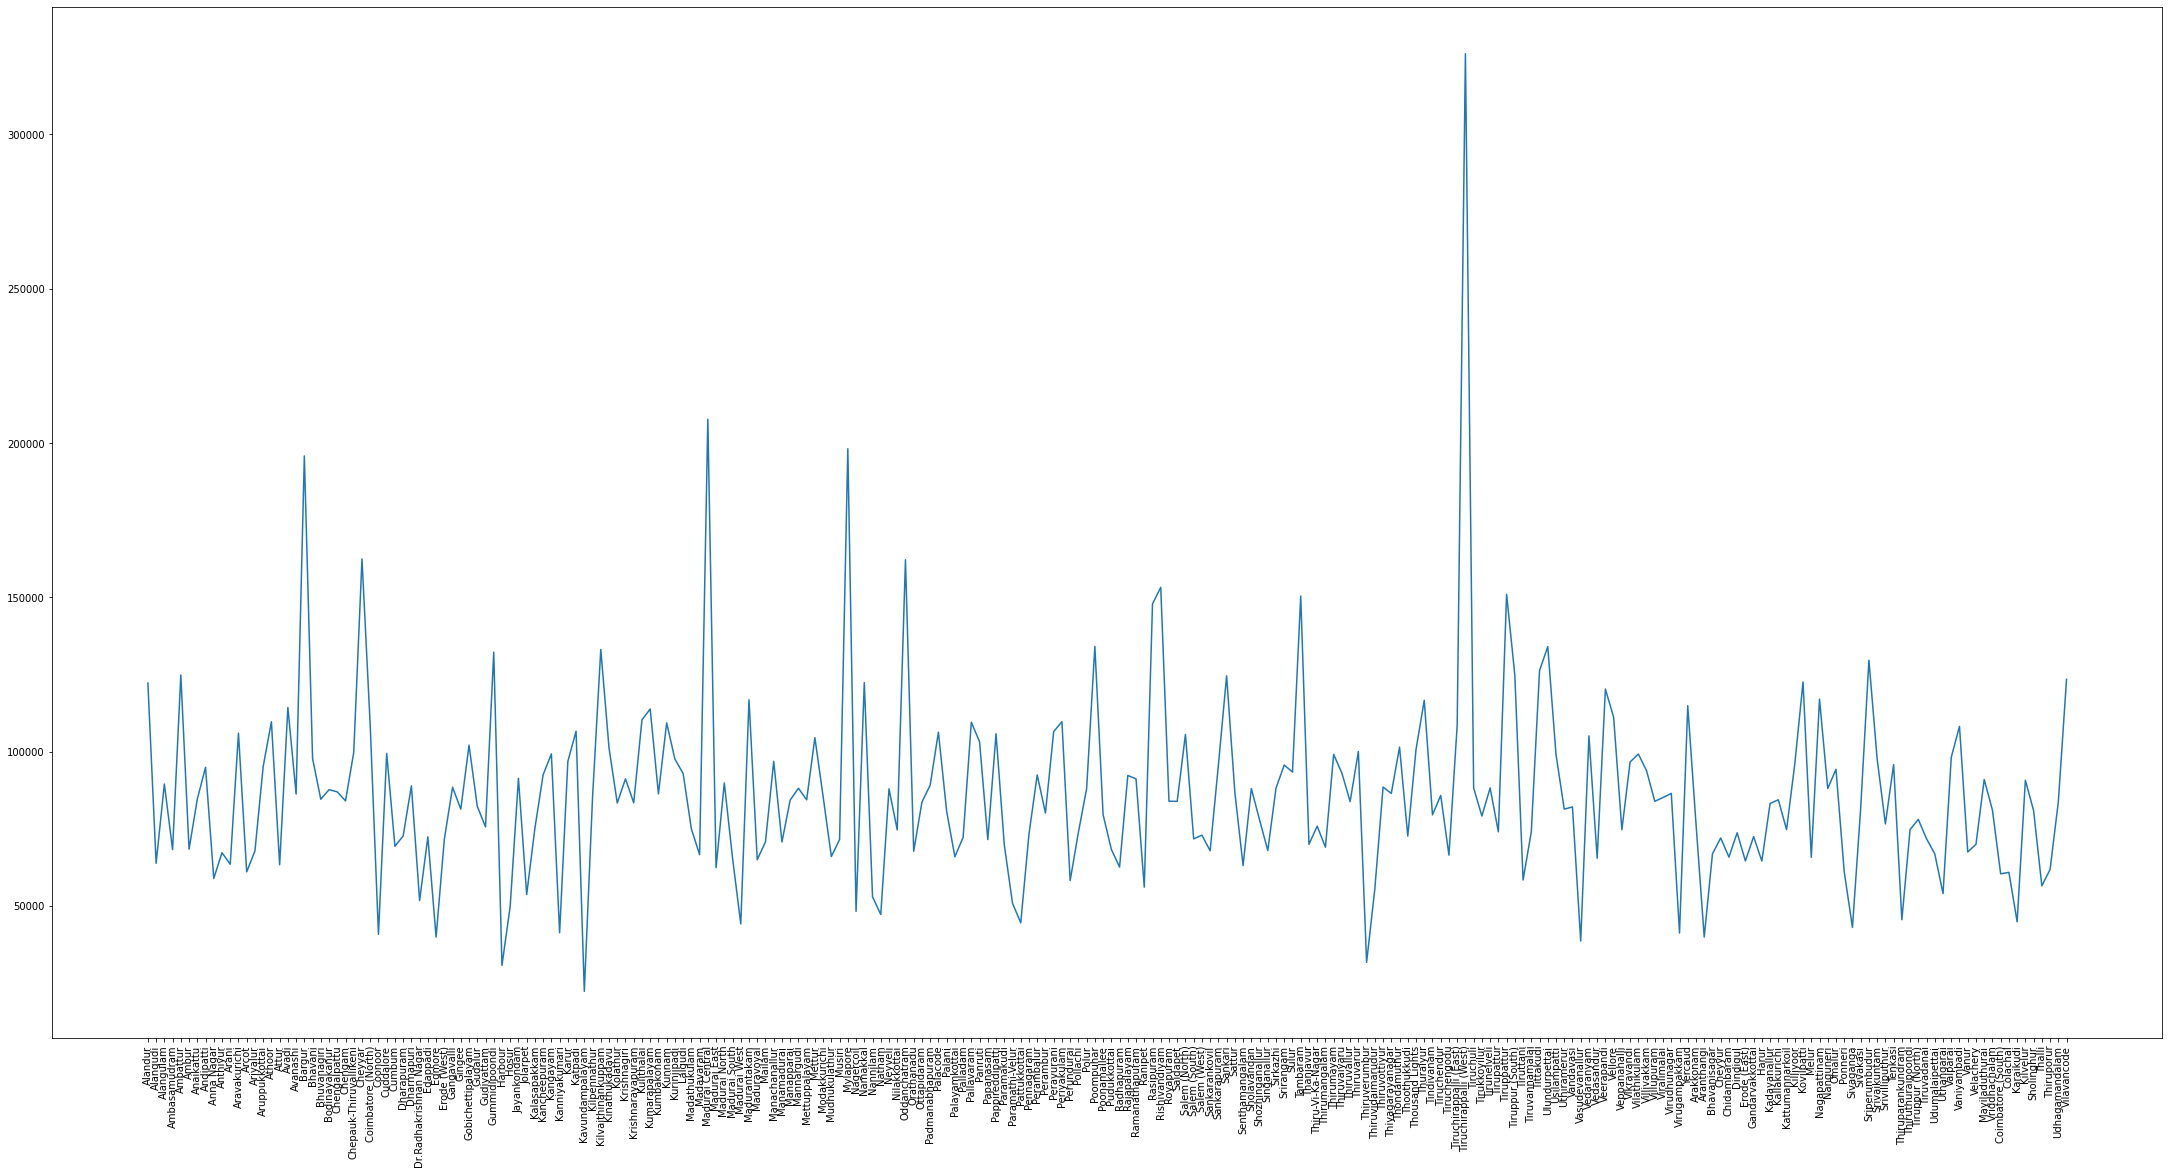

In [75]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
plt.tight_layout()
sns.lineplot(a,b)

## INDEPENDENT CANDIDATES PERFORMANCE

## Karur had the maximum number of independent candidates

In [76]:
data1_2_3_joined_2[data1_2_3_joined_2['Party']=='Independent'].groupby('Constituency')['Candidate'].count().sort_values(ascending=False)

Constituency
Karur                     68
Aravakurichi              32
Harbour                   22
Saidapet                  22
Kumarapalayam             21
Dr.Radhakrishnan Nagar    20
Kolathur                  20
Kangayam                  20
Paramathi-Velur           19
Aruppukkottai             19
Shozhinganallur           18
Tiruchengodu              18
Royapuram                 18
Tiruppattur               18
Vriddhachalam             18
Salem (West)              17
Radhapuram                17
Manachanallur             17
Edappadi                  17
Chepauk-Thiruvallikeni    16
Ambattur                  16
Kovilpatti                16
Krishnarayapuram          16
Thirumangalam             16
Virugampakkam             16
Sattur                    16
Palani                    16
Sankari                   15
Perundurai                15
Kunnam                    15
Villupuram                15
Kadayanallur              15
Mylapore                  15
Manapparai                14
S

## NO INDEPENDENT CANDIDATES HAVE WON IN THIS ELECTION

In [77]:
data1_2_3_joined_2[(data1_2_3_joined_2['Party']=='Independent') & data1_2_3_joined_2['Win/Loss']==1].shape[0]

0

## CLOSE NON-DRAVIDIAN PARTY CONTENDERS - CONSTITUENCY WISE

In [78]:
list_of_const=data1_2_3_joined_2['Constituency'].unique()

## VOTE WISE NTK STANDS MAJORLY AS THE THIRD COMPETITOR APART FROM DRAVIDIAN PARTIES BUT WITH NO SEATS

In [79]:

temp_non_drd=data1_2_3_joined_2[(data1_2_3_joined_2['Party'] != 'Dravida Munnetra Kazhagam') & (data1_2_3_joined_2['Party'] != 'All India Anna Dravida Munnetra Kazhagam')]
temp_non_drd=temp_non_drd.sort_values('Total_Votes',ascending=False)
temp_non_drd2=temp_non_drd.groupby('Constituency').first()
temp_non_drd2['Party'].value_counts()

Naam Tamilar Katchi                    117
Indian National Congress                24
Makkal Needhi Maiam                     22
Pattali Makkal Katchi                   18
Bharatiya Janata Party                  15
Amma Makkal Munnettra Kazagam           14
Viduthalai Chiruthaigal Katchi           6
Communist Party of India                 6
Communist Party of India  (Marxist)      5
Independent                              3
Indian Union Muslim League               3
SOCIAL DEMOCRATIC PARTY OF INDIA         1
Name: Party, dtype: int64

## SEAT WISE INC STANDS MAJORLY AS THE THIRD COMPETITOR APART FROM DRAVIDIAN PARTIES WITH 18 SEATS, FOLLOWED BY PMK, VCK, BJP, CPI & CPI(M)

In [80]:
data1_2_3_joined.groupby('Party')['Win/Loss'].sum().sort_values(ascending=False).head(10)

Party
Dravida Munnetra Kazhagam                   133
All India Anna Dravida Munnetra Kazhagam     66
Indian National Congress                     18
Pattali Makkal Katchi                         5
Viduthalai Chiruthaigal Katchi                4
Bharatiya Janata Party                        4
Communist Party of India                      2
Communist Party of India  (Marxist)           2
Namadhu Makkal Katchi                         0
People's Party of India(secular)              0
Name: Win/Loss, dtype: int64

## CLOSING REMARKS

1) DMK lead the win by 4.5% and 67 seats wrt ADMK (W/O alliance consideration)
    
   DMK lead the win by 5.6% and 84 seats wrt ADMK (With alliance) also around 50% of constituency had 1-10% of vote margin

3) In SC reserved constituencies DMK alliance won 28 seats and ADMK won 15 seats (none of ADMK's alliance won)

4) Seat wise INC is the third major contributor after DMK and ADMK

5) Vote wise NTK is the third major contributor after DMK and ADMK

6) ADMK alliance sweeped 3 locations - Coimbatore, Pollachi, Dharmapuri (Lok-Sabha constituencies) unanimously.

7) DMK alliance sweeped 10 locations - Sriperumbudur, Chennai Central, Tiruvallur, Tiruvannamalai, Cuddalore, Chennai Nort, Perambalur, Mayiladuthurai, Ramanathapuram, Chennai South (Lok-Sabha constituencies) unanimously.


